# Salary Prediction Project
---

In [1]:
#All imports 
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split , KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt
import matplotlib.pyplot as plt


In [2]:
#Loading the Dataset

salaryDB = pd.read_csv('../../data/Salary Data.csv');
salaryDB.head(5)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [3]:
# Checking and Removing for NaN
salaryDB[salaryDB.isna().any(axis=1)]

salaryDB = salaryDB.dropna()

---
### Splitting the Data into Training and Testing Sets
---

In [4]:
X = salaryDB[['Age' , 'Years of Experience']]
y = salaryDB['Salary']

#Splitting the dataset into training and testing sets
X_train, X_test , y_train , y_test = train_test_split(X,y, test_size=0.2, random_state=42)


---
### Fitting the Model
---

In [5]:

lr = LinearRegression()

kf = KFold(n_splits=25, shuffle=True, random_state=99)
scores = cross_val_score(lr, X, y, cv=kf)
print(f"Model Score: {np.mean(scores) * 100:.2f}%")

lr.fit(X_train, y_train)

pd.DataFrame(lr.coef_, index=X.columns, columns=['Coefficient'])


Model Score: 84.67%


,Coefficient
Age,2657.464194
Years of Experience,4008.061994


In [6]:
train_score = lr.score(X_train, y_train)
print(f"Train Score: {train_score * 100:.2f}%")

Train Score: 86.24%


---
### Performance Metrics
---

In [7]:

lr.predict(X_test)

y_pred = lr.predict(X_test)

test_score = r2_score(y_test, y_pred)

print(f"Test Score: {test_score * 100:.2f}%")

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", sqrt(mean_squared_error(y_test, y_pred)))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))



Test Score: 88.85%
Mean Squared Error: 267299022.8607745
Root Mean Squared Error: 16349.282028908012
Mean Absolute Error: 12358.463998978057


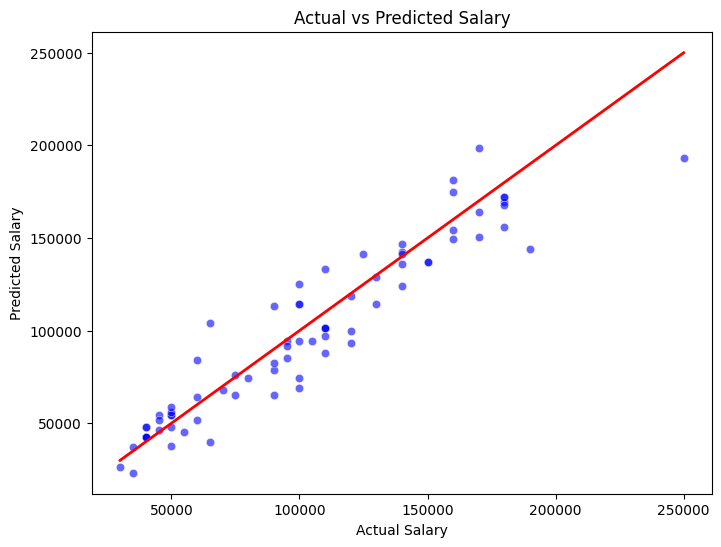

In [8]:
# Plot Actual vs Predicted using seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)  # 45-degree line
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual vs Predicted Salary')
plt.show()